In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
HUES = ["Devices", "Match Types"]

In [3]:
market_df = pd.read_csv("final_shop_6modata.csv")
market_df.head()

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951
2,Shop - 1:1 - Desk - [shop discount code],July,3635,1458,0.40,248,0.09,1606,1.10,1723,39165.46,117.136
3,Shop - 1:1 - Desk - [shop promo code],July,26185,10418,0.40,2294,0.12,13278,1.27,13042,284823.48,-235.921
4,Shop - 1:1 - Desk - [shop promo],July,808,282,0.35,61,0.15,391,1.39,337,7717.77,-53.604


In [4]:
def find_outliers(data: pd.DataFrame, feature: str)-> pd.DataFrame:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1

    low_iqr = data[feature] < q1 - 1.5*iqr
    high_iqr = data[feature] > q3 + 1.5*iqr

    outliers = data[low_iqr | high_iqr]

    print("Outliers Couns: ", len(outliers))
    top_outliers = outliers.sort_values(feature, ascending=False)[:5]

    return outliers, top_outliers

In [5]:
def box_and_line_plots(data: pd.DataFrame, feature: str):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 7))

    for i, _ in enumerate(axes):
        if i == 0:
            sns.boxplot(x=data[feature], ax=axes[0, 0])
            sns.lineplot(x="Month",y=market_df[feature], data=data, 
                         ci=None, ax=axes[0, 1], markers=True)
        else:
            sns.boxplot(x=data[feature], y=data[HUES[i-1]], ax=axes[i, 0])
            sns.lineplot(x="Month",y=market_df[feature], data=data, ci=None, 
                         hue=HUES[i-1], style=HUES[i-1], markers=True, ax=axes[i, 1])
    plt.show()

In [6]:
def multivariate_plot(data: pd.DataFrame, feature: str):
    pass

##### **Basic Data Information**

In [7]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ad Group     190 non-null    object 
 1   Month        190 non-null    object 
 2   Impressions  190 non-null    int64  
 3   Clicks       190 non-null    int64  
 4   CTR          190 non-null    float64
 5   Conversions  190 non-null    int64  
 6   Conv Rate    190 non-null    float64
 7   Cost         190 non-null    int64  
 8   CPC          190 non-null    float64
 9   Revenue      190 non-null    int64  
 10  Sale Amount  190 non-null    float64
 11  P&L          190 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 17.9+ KB


In [8]:
market_df.shape

(190, 12)

##### **Extracting Data from Ad Group Variable**
<p>The ad group contain multiple words that could be separated into sevaral columns to deepend our analysis</p>

In [9]:
market_df[["Shop", "Match Types", "Devices", "Ad Group"]] = market_df["Ad Group"].str.split(" - ", n=3, expand=True)
market_df.head(2)

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Shop,Match Types,Devices
0,[shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086,Shop,1:1,Desk
1,[shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951,Shop,1:1,Desk


In [10]:
market_df.drop(["Shop"], axis=1, inplace=True)
market_df.head(2)

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Match Types,Devices
0,[shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086,1:1,Desk
1,[shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951,1:1,Desk


In [11]:
# Change device data for better clarity
initial_name = market_df["Devices"].unique()
new_name = ["Desktop", "Mobile"]
change_name = dict(zip(initial_name, new_name))

market_df["Devices"].replace(change_name, inplace=True)

##### **Extracting CPM (Cost Per Mile) Data**

In [12]:
market_df["CPM"] = (market_df["Cost"] / market_df["Impressions"]) * 1000
market_df["CPM"].head(3)

0    415.824916
1    376.995228
2    441.815681
Name: CPM, dtype: float64

##### **Extracting Cost Per Acquisition (CPA) Data**

In [13]:
market_df["CPA"] = market_df["Cost"]/market_df["Conversions"]
market_df["CPA"].head(3)

0    5.719554
1    6.282450
2    6.475806
Name: CPA, dtype: float64

##### **Extracting Revenue Over Ad Spends (ROAS) Data**

In [14]:
market_df["ROAS"] = market_df["Revenue"]/market_df["Cost"]
market_df["ROAS"].head(3)

0    0.959964
1    0.964790
2    1.072852
Name: ROAS, dtype: float64

##### **Data Cleaning**

In [15]:
# Checking Null or empty data in the dataset
total_null = market_df.isnull().any().sum()

# Verify Null
if total_null == 0:
    print("No Empty Data")
else:
    print("There are Empty Data")

No Empty Data


In [16]:
# Checking Duplicates
total_duplicates = market_df.duplicated(keep=False).sum()

# Verify Duplicates
if total_duplicates == 0:
    print("No Duplicates")
else:
    print("There are duplicates")

No Duplicates


<p><strong>Change Variable (Column Name)</strong></p>
<ul>
    <li>Sale Amount column name to Sales Amount</li>
    <li>Conv Rate column name to Conversion Rate'</li>
<ul>

In [17]:
new_column = {"Sale Amount": "Sales Amount", "Conv Rate": "Conversion Rate"}
market_df.rename(columns=new_column, inplace=True)

market_df["Sales Amount"].head(3)

0    136770.05
1    283215.21
2     39165.46
Name: Sales Amount, dtype: float64

In [18]:
market_df["Conversion Rate"].head(3)

0    0.10
1    0.09
2    0.09
Name: Conversion Rate, dtype: float64

##### **Analyzing Impression Data**

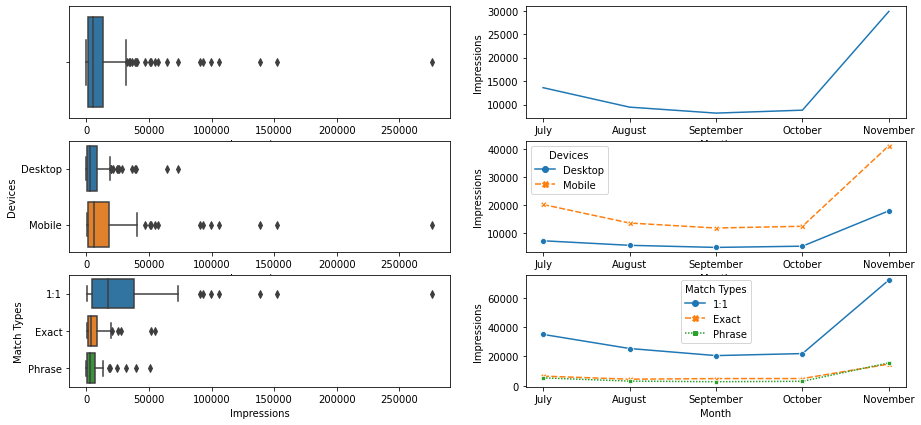

In [19]:
feature = "Impressions"
box_and_line_plots(data=market_df, feature=feature)

In [20]:
outliers, top_outliers = find_outliers(data=market_df, feature=feature)
top_outliers[:3]

Outliers Couns:  21


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conversion Rate,Cost,CPC,Revenue,Sales Amount,P&L,Match Types,Devices,CPM,CPA,ROAS
151,[shop coupon],November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.10,-5605.297,1:1,Mobile,138.385497,6.420567,0.853552
6,[shop coupon],July,152394,59177,0.39,2666,0.04,19371,0.33,13699,294536.92,-5672.271,1:1,Mobile,127.111304,7.265941,0.707191
159,[shop promo code],November,138811,57405,0.41,7563,0.10,43542,0.76,42440,886095.31,-1101.899,1:1,Mobile,313.678311,5.757239,0.974691


##### **Analyzing Clicks Data**

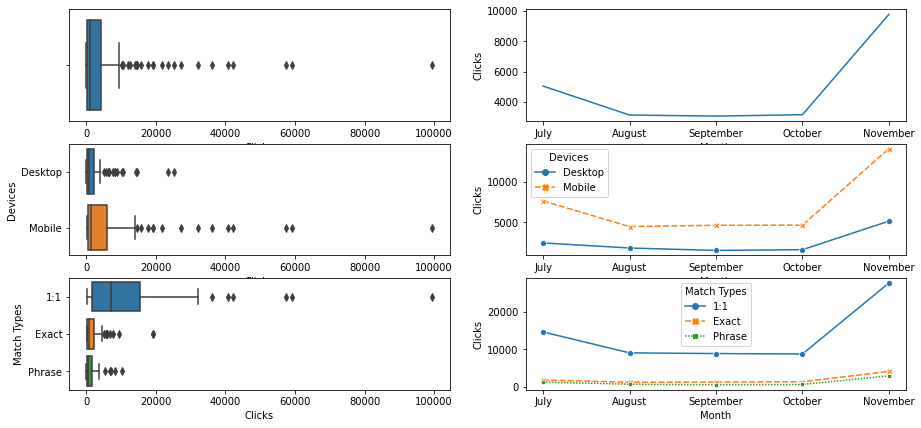

In [21]:
feature = "Clicks"
box_and_line_plots(data=market_df, feature=feature)

In [22]:
outliers, top_outliers = find_outliers(data=market_df, feature=feature)
top_outliers[:3]

Outliers Couns:  24


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conversion Rate,Cost,CPC,Revenue,Sales Amount,P&L,Match Types,Devices,CPM,CPA,ROAS
151,[shop coupon],November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.10,-5605.297,1:1,Mobile,138.385497,6.420567,0.853552
6,[shop coupon],July,152394,59177,0.39,2666,0.04,19371,0.33,13699,294536.92,-5672.271,1:1,Mobile,127.111304,7.265941,0.707191
159,[shop promo code],November,138811,57405,0.41,7563,0.10,43542,0.76,42440,886095.31,-1101.899,1:1,Mobile,313.678311,5.757239,0.974691


##### **Analyzing CTR Data**

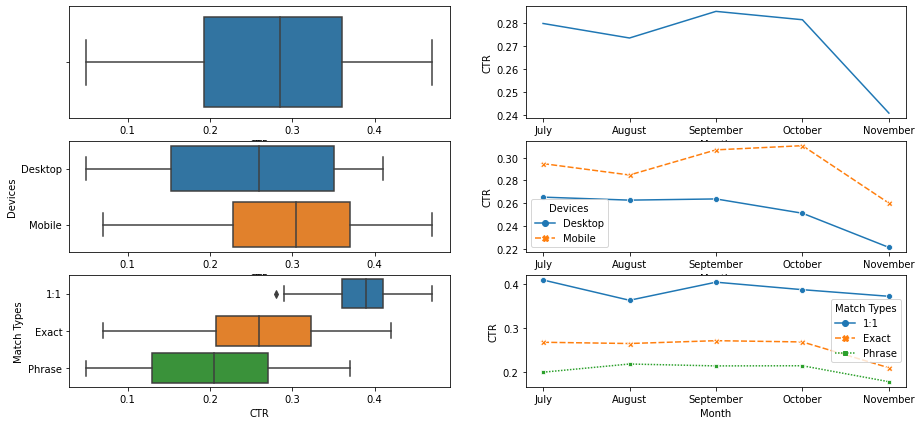

In [23]:
feature = "CTR"
box_and_line_plots(data=market_df, feature=feature)

In [24]:
outliers, top_outliers = find_outliers(data=market_df, feature=feature)
top_outliers[:3]

Outliers Couns:  0


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conversion Rate,Cost,CPC,Revenue,Sales Amount,P&L,Match Types,Devices,CPM,CPA,ROAS


##### **Analyzing Conversions Data**

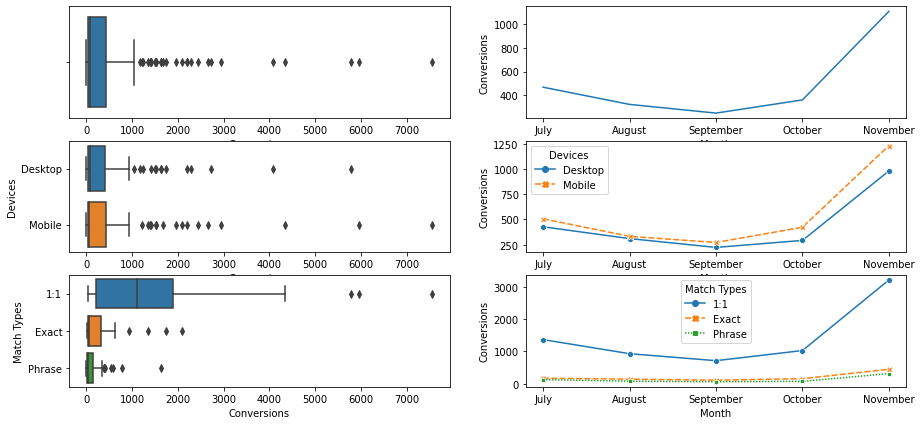

In [25]:
feature = "Conversions"
box_and_line_plots(data=market_df, feature=feature)

In [26]:
outliers, top_outliers = find_outliers(data=market_df, feature=feature)
top_outliers[:3]

Outliers Couns:  29


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conversion Rate,Cost,CPC,Revenue,Sales Amount,P&L,Match Types,Devices,CPM,CPA,ROAS
159,[shop promo code],November,138811,57405,0.41,7563,0.10,43542,0.76,42440,886095.31,-1101.899,1:1,Mobile,313.678311,5.757239,0.974691
151,[shop coupon],November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.10,-5605.297,1:1,Mobile,138.385497,6.420567,0.853552
153,[shop promo code],November,64067,23538,0.37,5782,0.15,37729,1.60,34518,725773.92,-3211.121,1:1,Desktop,588.899121,6.525251,0.914893


##### **Analyzing Conversion Rate Data**

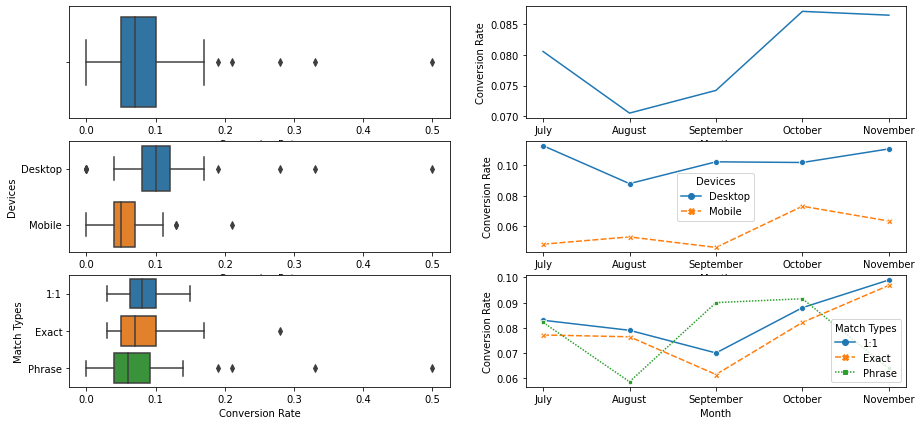

In [27]:
feature = "Conversion Rate"
box_and_line_plots(data=market_df, feature=feature)

In [28]:
outliers, total_outliers = find_outliers(data=market_df, feature=feature)
total_outliers

Outliers Couns:  5


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conversion Rate,Cost,CPC,Revenue,Sales Amount,P&L,Match Types,Devices,CPM,CPA,ROAS
112,Free Shipping,September,52,4,0.08,1,0.50,1,0.43,20,678.00,19.340,Phrase,Desktop,19.230769,1.000000,20.000000
24,Competitor,July,36,5,0.14,2,0.33,5,1.05,13,261.40,8.070,Phrase,Desktop,138.888889,2.500000,2.600000
185,Black Friday/Cyber Monday,November,257,24,0.09,7,0.28,3,0.14,45,898.80,41.946,Exact,Desktop,11.673152,0.428571,15.000000
150,Free Shipping,October,100,14,0.14,3,0.21,3,0.26,4,83.20,1.161,Phrase,Mobile,30.000000,1.000000,1.333333
28,Offer,July,389,54,0.14,10,0.19,58,1.09,63,1264.52,5.229,Phrase,Desktop,149.100257,5.800000,1.086207


##### **Analyzing Cost Data** 

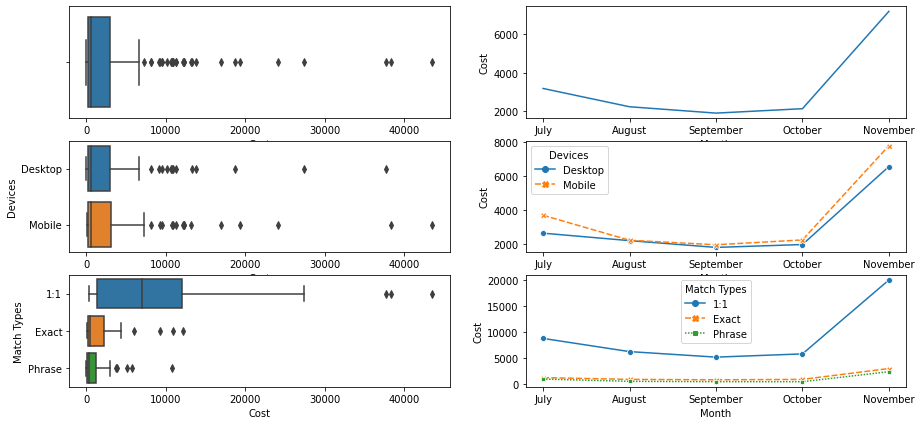

In [29]:
feature = "Cost"
box_and_line_plots(data=market_df, feature=feature)

In [30]:
outliers, top_outliers = find_outliers(data=market_df, feature=feature)
top_outliers[:3]

Outliers Couns:  29


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conversion Rate,Cost,CPC,Revenue,Sales Amount,P&L,Match Types,Devices,CPM,CPA,ROAS
159,[shop promo code],November,138811,57405,0.41,7563,0.10,43542,0.76,42440,886095.31,-1101.899,1:1,Mobile,313.678311,5.757239,0.974691
151,[shop coupon],November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.10,-5605.297,1:1,Mobile,138.385497,6.420567,0.853552
153,[shop promo code],November,64067,23538,0.37,5782,0.15,37729,1.60,34518,725773.92,-3211.121,1:1,Desktop,588.899121,6.525251,0.914893


##### **Analzing CPC (Cost Per Click) Data**

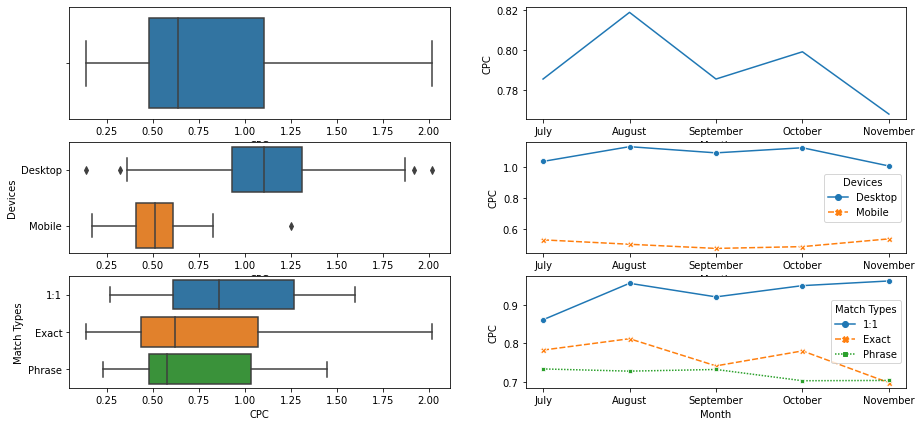

In [31]:
feature = "CPC"
box_and_line_plots(market_df, feature=feature)

In [32]:
outliers, top_outliers = find_outliers(market_df, feature)
top_outliers

Outliers Couns:  0


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conversion Rate,Cost,CPC,Revenue,Sales Amount,P&L,Match Types,Devices,CPM,CPA,ROAS


##### **Analyzing Cost Per Mile/Impressions (CPM) Data**

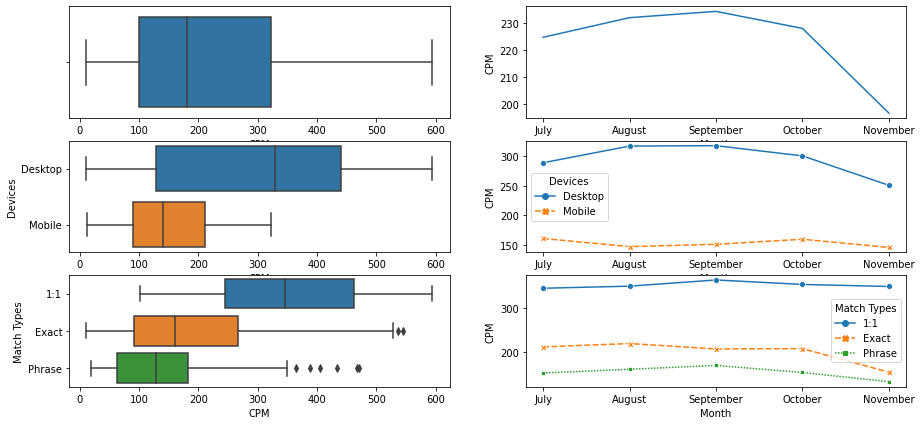

In [33]:
feature = "CPM"
box_and_line_plots(market_df, feature)

##### **Analyzing Revenue Data** 

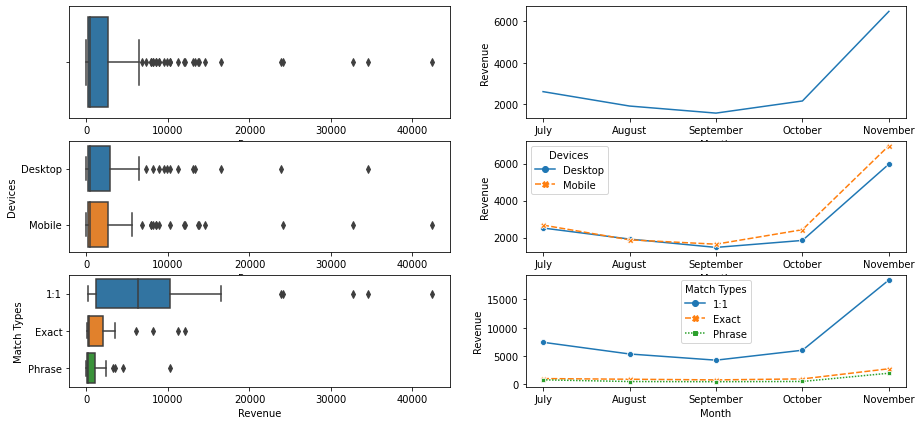

In [34]:
feature = "Revenue"
box_and_line_plots(market_df, feature)

In [35]:
outliers, top_outliers = find_outliers(data=market_df, feature=feature)
top_outliers[:3]

Outliers Couns:  28


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conversion Rate,Cost,CPC,Revenue,Sales Amount,P&L,Match Types,Devices,CPM,CPA,ROAS
159,[shop promo code],November,138811,57405,0.41,7563,0.10,43542,0.76,42440,886095.31,-1101.899,1:1,Mobile,313.678311,5.757239,0.974691
153,[shop promo code],November,64067,23538,0.37,5782,0.15,37729,1.60,34518,725773.92,-3211.121,1:1,Desktop,588.899121,6.525251,0.914893
151,[shop coupon],November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.10,-5605.297,1:1,Mobile,138.385497,6.420567,0.853552


##### **Analyzing Return on Ad Spend (ROAS)**

In [36]:
# Create ROAS columns
market_df["ROAS"] = market_df["Revenue"]/market_df["Cost"]

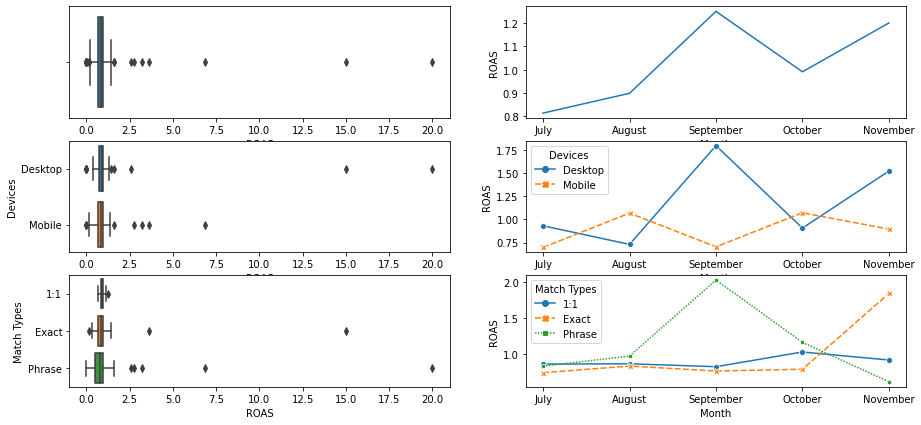

In [37]:
feature = "ROAS"
box_and_line_plots(data=market_df, feature=feature)

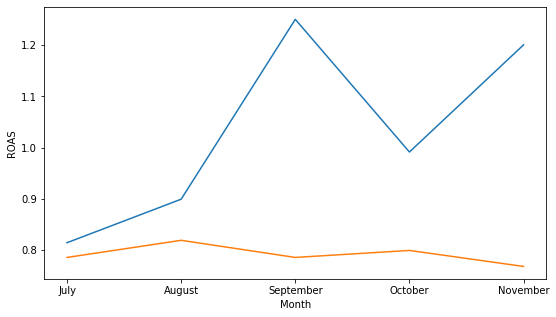

In [38]:
fig, _ = plt.subplots(figsize=(9, 5))

sns.lineplot(x="Month", y="ROAS", ci=None, data=market_df)
sns.lineplot(x="Month", y="CPC", ci=None, data=market_df)

plt.show()

##### **Analyzing Cost Per Acquisition (CPA) Metrics**

In [39]:
# Get CPA Data
market_df["CPA"] = market_df["Cost"]/market_df["Conversions"]

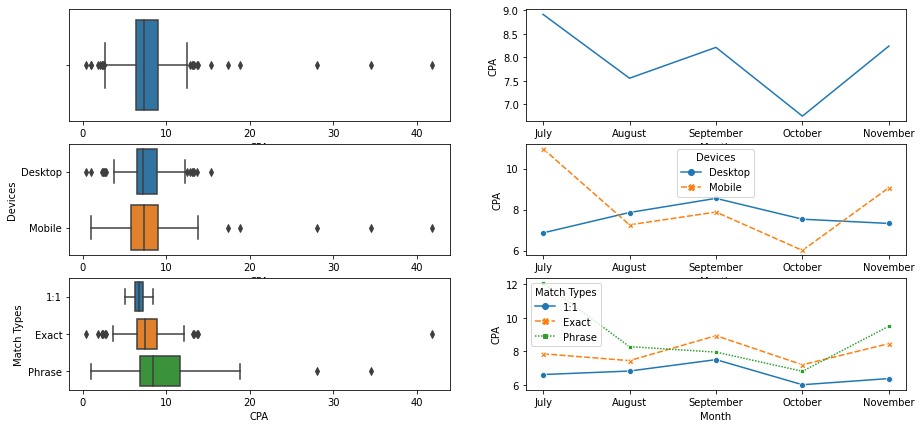

In [40]:
feature = "CPA"
box_and_line_plots(data=market_df, feature=feature)

##### **Sales Amount Data**

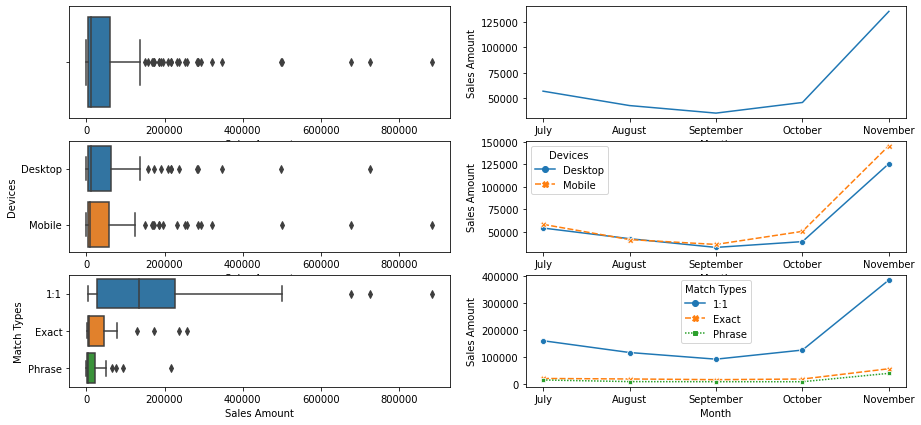

In [41]:
feature = "Sales Amount"
box_and_line_plots(data=market_df, feature=feature)

In [42]:
outliers, top_outliers = find_outliers(data=market_df, feature=feature)
top_outliers[:3]

Outliers Couns:  28


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conversion Rate,Cost,CPC,Revenue,Sales Amount,P&L,Match Types,Devices,CPM,CPA,ROAS
159,[shop promo code],November,138811,57405,0.41,7563,0.10,43542,0.76,42440,886095.31,-1101.899,1:1,Mobile,313.678311,5.757239,0.974691
153,[shop promo code],November,64067,23538,0.37,5782,0.15,37729,1.60,34518,725773.92,-3211.121,1:1,Desktop,588.899121,6.525251,0.914893
151,[shop coupon],November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.10,-5605.297,1:1,Mobile,138.385497,6.420567,0.853552


##### **Analyzing P&L Data** 

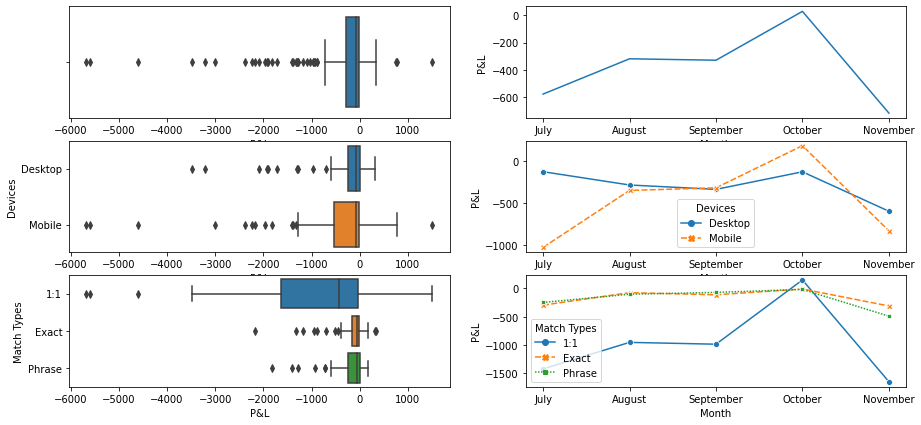

In [43]:
feature = "P&L"
box_and_line_plots(data=market_df, feature=feature)

In [44]:
outliers, top_outliers = find_outliers(data=market_df, feature=feature)
top_outliers[:3]

Outliers Couns:  32


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conversion Rate,Cost,CPC,Revenue,Sales Amount,P&L,Match Types,Devices,CPM,CPA,ROAS
114,[shop coupon],October,93406,36068,0.39,2444,0.05,12236,0.34,13744,285638.30,1507.685,1:1,Mobile,130.998009,5.006547,1.123243
115,[shop promo code],October,34929,15595,0.45,2193,0.09,11258,0.72,12025,252296.27,766.859,1:1,Mobile,322.310974,5.133607,1.068129
118,[shop coupon code],October,28102,12485,0.44,1393,0.07,7192,0.58,7955,166656.05,762.921,1:1,Mobile,255.924845,5.162958,1.106090


##### **Checking Match Type, Devices, Ad Group**

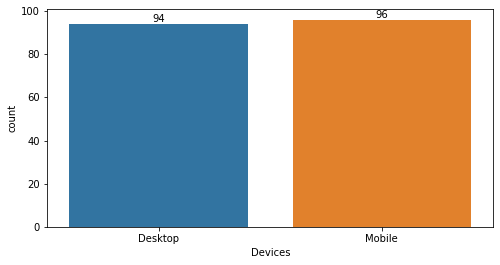

In [53]:
fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x="Devices", data=market_df)
ax.bar_label(ax.containers[0])

plt.show()

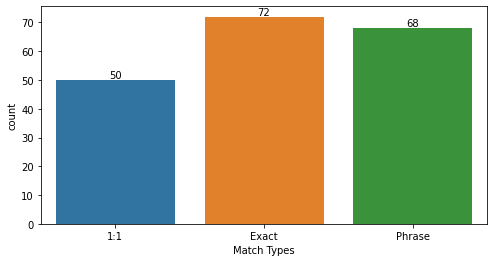

In [57]:
fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x="Match Types", data=market_df)
ax.bar_label(ax.containers[0])

plt.show()

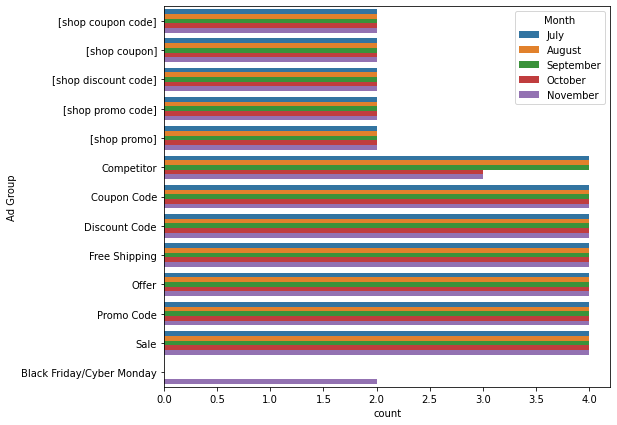

In [67]:
fig, ax = plt.subplots(figsize=(8, 7))
ax = sns.countplot(y="Ad Group", hue="Month", data=market_df)
# ax.bar_label(ax.containers[0])

plt.show()

In [65]:
filter_param = market_df["Ad Group"] == "Black Friday/Cyber Monday"
market_df[filter_param]

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conversion Rate,Cost,CPC,Revenue,Sales Amount,P&L,Match Types,Devices,CPM,CPA,ROAS
185,Black Friday/Cyber Monday,November,257,24,0.09,7,0.28,3,0.14,45,898.80,41.946,Exact,Desktop,11.673152,0.428571,15.000000
188,Black Friday/Cyber Monday,November,3662,266,0.07,24,0.09,44,0.17,160,3268.63,115.963,Exact,Mobile,12.015292,1.833333,3.636364
